<span style="color:blue">**Using Machine Learning to Predict Carbon Footprint:<br> 
Linear Regression (MixMaxScaler)<BR> Ridge Lasso<BR> Gridsearch<br>Cross Validation**</span><br>


<img src="/Users/miguelopez/Desktop/4-Proyecto ML/img/carbon.png" width="500">

In [2]:
# Libraries
import pandas as pd
import os # operating system    
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns   


In [3]:
print(os.getcwd()) 

/Users/miguelopez/Desktop/4-Proyecto ML/src/notebooks


<span style="color:green">**Linear Regression**</span>
 <br>

In [4]:
# import scaled_df
df=pd.read_csv('/Users/miguelopez/Desktop/4-Proyecto ML/src/data_processed/df_final.csv')

In [5]:
df.tail()

,Unnamed: 0,Monthly Grocery Bill,Vehicle Monthly Distance Km,Waste Bag Weekly Count,How Long TV PC Daily Hour,How Many New Clothes Monthly,How Long Internet Daily Hour,CarbonEmission,Body Type_normal,Body Type_obese,...,Cooking_With_['Oven'],"Cooking_With_['Stove', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Microwave']","Cooking_With_['Stove', 'Oven', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave', 'Grill', 'Airfryer']","Cooking_With_['Stove', 'Oven', 'Microwave']","Cooking_With_['Stove', 'Oven']",Cooking_With_['Stove'],Cooking_With_[]
9995,9995,0.722892,0.026803,0.666667,0.500000,0.54,0.375000,0.260439,0,1,...,0,0,0,0,0,0,0,0,0,0
9996,9996,0.738956,0.531653,0.333333,0.583333,0.16,1.000000,0.344195,1,0,...,0,0,0,1,0,0,0,0,0,0
9997,9997,0.995984,0.009601,0.666667,0.458333,0.10,1.000000,0.256598,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,9998,0.518072,0.868887,0.666667,0.791667,0.28,0.208333,0.528807,0,0,...,0,0,1,0,0,0,0,0,0,0
9999,9999,0.261044,0.995300,0.500000,0.458333,0.12,0.000000,0.064428,0,1,...,0,0,0,0,0,0,0,0,0,0


curva rock 

In [6]:
# Split data / convert to numpy array
X = df.iloc[:, :-1].values 
y = df.iloc[:, -1].values


In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2) 



In [8]:
from sklearn.linear_model import LinearRegression   
model=LinearRegression()
model.fit(X_train,y_train)  
y_pred = model.predict(X_test)


In [9]:
#  Metrics 

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred) 
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)


# Print metrics
print("Linear Regression Metrics")
print("--------------------------")
print("R2: ", r2)
print("MAE: ", mae)
print("MSE: ", mse)  
print("RMSE: ", rmse)



Linear Regression Metrics
--------------------------
R2:  1.0
MAE:  8.455458555545192e-16
MSE:  1.1146358071740016e-30
RMSE:  1.055763139711745e-15


RIDGE AND LASSO

In [10]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

# Assume X and y are the training features and target

# Ridge regression
ridge = Ridge(alpha=0.1) 
ridge.fit(X, y)
ridge_preds = ridge.predict(X)
ridge_mse = mean_squared_error(y, ridge_preds)

# Lasso regression
lasso = Lasso(alpha=0.1)
lasso.fit(X, y) 
lasso_preds = lasso.predict(X)
lasso_mse = mean_squared_error(y, lasso_preds)
# Calculate R-squared
ridge_r2 = r2_score(y, ridge_preds)
lasso_r2 = r2_score(y, lasso_preds)

# Calculate MAE
ridge_mae = mean_absolute_error(y, ridge_preds)  
lasso_mae = mean_absolute_error(y, lasso_preds)

# Calculate RMSE
from sklearn.metrics import mean_squared_error
ridge_rmse = mean_squared_error(y, ridge_preds, squared=False)
lasso_rmse = mean_squared_error(y, lasso_preds, squared=False)


print("Ridge and Lasso Regression MinMaxScaler")
print("---------------------------")
print('Ridge R-squared:', ridge_r2)
print('Lasso R-squared:', lasso_r2) 

print('Ridge MAE:', ridge_mae)
print('Lasso MAE:', lasso_mae)

print('Ridge RMSE:', ridge_rmse)
print('Lasso RMSE:', lasso_rmse)




print('Ridge MSE:', ridge_mse) 
print('Lasso MSE:', lasso_mse)

Ridge and Lasso Regression MinMaxScaler
---------------------------
Ridge R-squared: 0.9999929796887977
Lasso R-squared: 0.00021543552201686023
Ridge MAE: 0.0002998276895143288
Lasso MAE: 0.11330364483914164
Ridge RMSE: 0.0006307125194090344
Lasso RMSE: 0.23801618134271801
Ridge MSE: 3.9779828213929154e-07
Lasso MSE: 0.05665170258096963


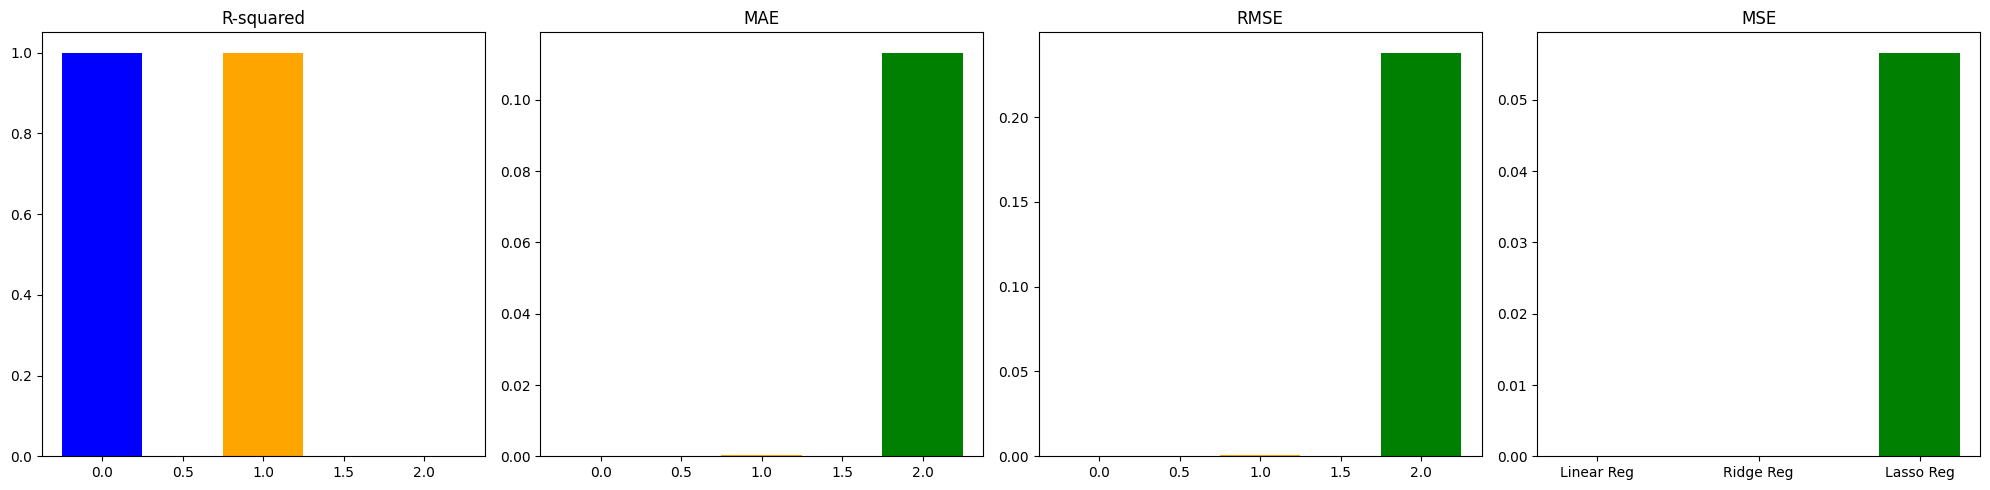

In [15]:
# Colors 
colors = ['blue', 'orange', 'green']

# plots
fig, axs = plt.subplots(1, 4, figsize=(20,5)) 
axs[3].bar([0,1,2], [mse, ridge_mse, lasso_mse], width=0.5, color=colors)
axs[3].set_xticks([0,1,2])
axs[3].set_xticklabels(['Linear Reg', 'Ridge Reg', 'Lasso Reg'])
axs[3].set_title('MSE')

# R-squared
axs[0].bar([0,1,2], [r2, ridge_r2, lasso_r2], width=0.5, color=colors)
axs[0].set_title('R-squared')
# MAE
axs[1].bar([0,1,2], [mae, ridge_mae, lasso_mae], width=0.5, color=colors) 
axs[1].set_title('MAE')
# RMSE
axs[2].bar([0,1,2], [rmse, ridge_rmse, lasso_rmse], width=0.5, color=colors)
axs[2].set_title('RMSE')

plt.tight_layout()
plt.show()

TUNNING GRIDSEARCH

In [12]:
from sklearn.model_selection import GridSearchCV

ridge = Ridge()

params = {'alpha': [0.1, 1, 10, 100, 1000]}

gs = GridSearchCV(ridge, params, scoring='neg_mean_squared_error', cv=3)
gs.fit(X_train, y_train)

print("Best parameters:", gs.best_params_)
print("Best score ridge MSE gridsearch:", gs.best_score_)

best_ridge = gs.best_estimator_
ridge_preds = best_ridge.predict(X_test)

Best parameters: {'alpha': 0.1}
Best score ridge MSE gridsearch: -1.4147984004290585e-06


CROSS VALIDATION

In [13]:
from sklearn.model_selection import cross_val_score

cross_val = LinearRegression()

# Perform 2-fold cross validation
cv_scores = cross_val_score(cross_val, X, y, cv=2)

print("Cross-validation scores:", cv_scores)
print("Average cross-validation score: ", cv_scores.mean())
print("R-squared of cross-validation score: ", np.mean(cv_scores)**2)   
print("rmse of cross-validation score: ", np.sqrt(np.mean(cv_scores)))
print("mse of cross-validation score: ", np.mean(cv_scores))    



Cross-validation scores: [1. 1.]
Average cross-validation score:  1.0
R-squared of cross-validation score:  1.0
rmse of cross-validation score:  1.0
mse of cross-validation score:  1.0


<!-- gridsearch / validacion cruzada -->